RSNA chest X-Ray data analysis

In [1]:
import pandas as pd
class_info = pd.read_csv('/Users/achu/Documents/Projects/Data-Science/Medical Report Generation/remote-dataset/rsna-pneumonia-detection-challenge/stage_2_detailed_class_info.csv')
class_info.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [2]:
print(class_info.info())
labels = class_info['class'].unique()
print(labels)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patientId  30227 non-null  object
 1   class      30227 non-null  object
dtypes: object(2)
memory usage: 472.4+ KB
None
['No Lung Opacity / Not Normal' 'Normal' 'Lung Opacity']


In [7]:
import plotly.express as px

# Count frequency of each class
class_distribution = class_info['class'].value_counts().reset_index()
class_distribution.columns = ['Class', 'Count']

# Create pie chart
fig = px.pie(class_distribution, 
             values='Count',
             names='Class',
             title='Distribution of Classes in RSNA Dataset',
             color='Class')

# Update layout for better readability
fig.update_layout(
    width=800,
    height=500
)

fig.show()



In [3]:
sample_submission_method = pd.read_csv('/Users/achu/Documents/Projects/Data-Science/Medical Report Generation/remote-dataset/rsna-pneumonia-detection-challenge/stage_2_sample_submission.csv')
sample_submission_method.head()

,patientId,PredictionString
0,0000a175-0e68-4ca4-b1af-167204a7e0bc,0.5 0 0 100 100
1,0005d3cc-3c3f-40b9-93c3-46231c3eb813,0.5 0 0 100 100
2,000686d7-f4fc-448d-97a0-44fa9c5d3aa6,0.5 0 0 100 100
3,000e3a7d-c0ca-4349-bb26-5af2d8993c3d,0.5 0 0 100 100
4,00100a24-854d-423d-a092-edcf6179e061,0.5 0 0 100 100


In [4]:
train_labels = pd.read_csv('/Users/achu/Documents/Projects/Data-Science/Medical Report Generation/remote-dataset/rsna-pneumonia-detection-challenge/stage_2_train_labels.csv')
train_labels.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


Image Analysis of The RSNA dataset

Study ID: 0004cfab-14fd-4e49-80ba-63a80b6bddd6
Image Dimensions: 1024x1024


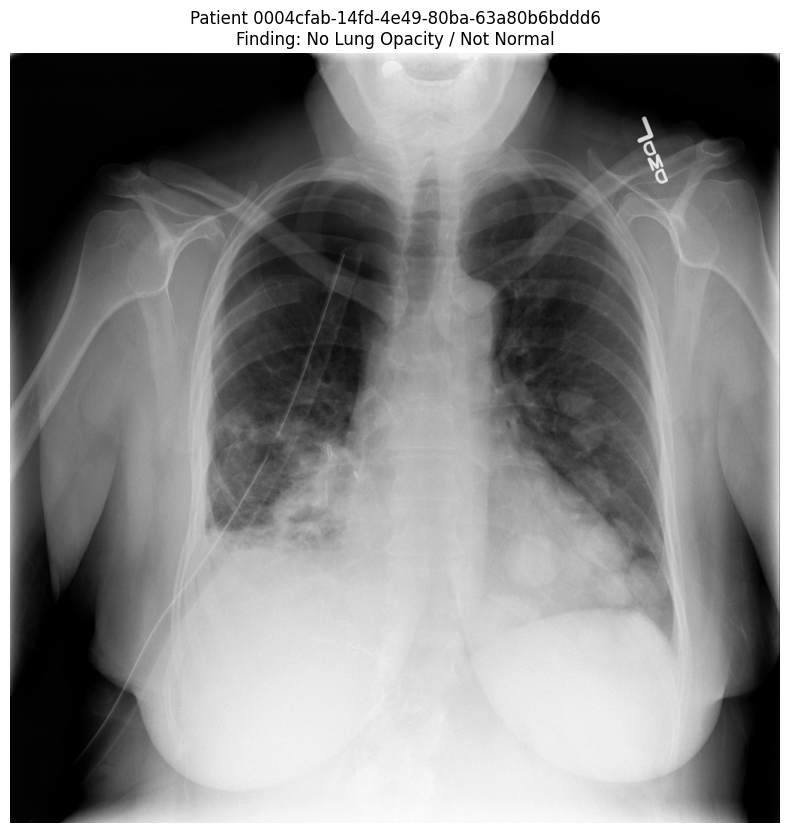

Study ID: 003d8fa0-6bf1-40ed-b54c-ac657f8495c5
Image Dimensions: 1024x1024


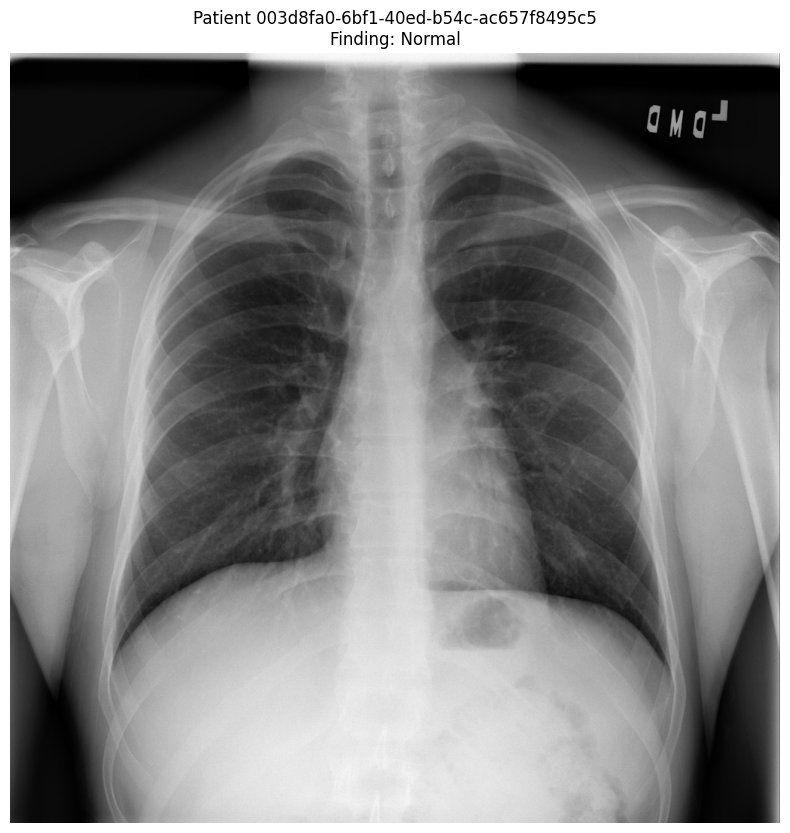

Study ID: 00436515-870c-4b36-a041-de91049b9ab4
Image Dimensions: 1024x1024


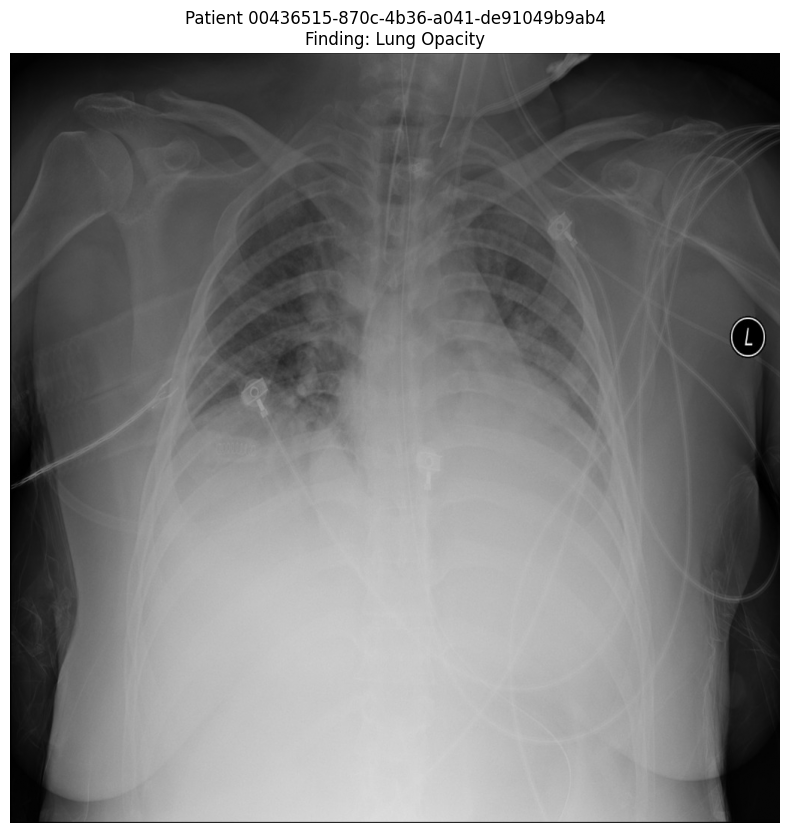

In [5]:
import pydicom
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def load_and_display_dicom(patientId, specific_finding):
    # Load DICOM file
    image_path = f"/Users/achu/Documents/Projects/Data-Science/Medical Report Generation/remote-dataset/rsna-pneumonia-detection-challenge/stage_2_train_images/{patientId}.dcm"
    dicom = pydicom.dcmread(image_path)
    
    # Convert to array and normalize
    array = dicom.pixel_array
    array = ((array - array.min()) * (255.0 / (array.max() - array.min()))).astype(np.uint8)
    
    # Print dimensions
    print(f"Image Dimensions: {array.shape[1]}x{array.shape[0]}")
    
    # Display
    plt.figure(figsize=(10, 10))
    plt.imshow(array, cmap='gray')  # Use grayscale colormap for X-rays
    plt.title(f"Patient {patientId}\nFinding: {specific_finding}")
    plt.axis("off")
    plt.show()

# For each class
for specific_finding in ["No Lung Opacity / Not Normal", "Normal", "Lung Opacity"]:
    # Find patientId
    patient_info = class_info[class_info['class'] == specific_finding]
    patientId = patient_info['patientId'].values[0]
    print(f"Study ID: {patientId}")
    
    # Load and display
    load_and_display_dicom(patientId, specific_finding)

In [3]:
import pandas as pd
import os

def count_rsna_data():
    # Read the detailed class info CSV
    detailed_class_df = pd.read_csv('/Users/anyhow/projects/data_science/Medical-Report-Generation/remote-dataset/rsna-pneumonia-detection-challenge/stage_2_detailed_class_info.csv')
    
    # Count unique patients
    unique_patients = detailed_class_df['patientId'].nunique()
    
    # Count files in test and train directories
    test_path = '/Users/anyhow/projects/data_science/Medical-Report-Generation/remote-dataset/rsna-pneumonia-detection-challenge/stage_2_test_images'
    train_path = '/Users/anyhow/projects/data_science/Medical-Report-Generation/remote-dataset/rsna-pneumonia-detection-challenge/stage_2_train_images'
    
    test_files = len([f for f in os.listdir(test_path) if f.endswith('.dcm')])
    train_files = len([f for f in os.listdir(train_path) if f.endswith('.dcm')])
    total_files = test_files + train_files
    
    print(f"Number of unique patients in detailed class info: {unique_patients}")
    print(f"Number of files in test directory: {test_files}")
    print(f"Number of files in train directory: {train_files}")
    print(f"Total number of files: {total_files}")
    print(f"{'Numbers match' if unique_patients == total_files else 'Numbers do not match'}")

if __name__ == "__main__":
    count_rsna_data()

Number of unique patients in detailed class info: 26684
Number of files in test directory: 3000
Number of files in train directory: 26684
Total number of files: 29684
Numbers do not match
